In [1]:
from utils.fileUtils.sr import NMSSM_MX_700_MY_400

In [2]:
from hep_ml import reweight

In [3]:
import uproot

In [4]:
from pandas import DataFrame

In [104]:
sigTree = Tree(NMSSM_MX_700_MY_400)

In [116]:
sigTree.initialize_t6_X()

vector.obj(pt=[174, 92.3, 236, 192, 125, 106, 934, 221, ... 544, 236, 200, 232, 240, 227, 255, 222], phi=[2.44, 2.59, -0.661, -2.35, -2.9, 2.41, 2.58, ... -1.27, -1.91, -0.648, 2.27, 1.1, 3], eta=[2.2, 1.69, 0.531, -1.42, -1.51, 0.108, ... -0.437, 0.323, -0.632, 0.962, 0.902], mass=[183, 132, 118, 153, 180, 123, 514, 130, ... 237, 140, 113, 135, 182, 170, 152, 128])
vector.obj(pt=[153, 65.3, 137, 57.5, 85.1, 96.3, 749, 146, ... 159, 172, 114, 220, 69.5, 201, 162], phi=[-0.932, 0.78, 2.87, 2.14, 0.71, -0.475, ... 2.35, 0.655, 2.64, -0.749, -1.26, -1.25], eta=[1.07, -0.635, -0.125, 0.298, 0.328, 1.2, ... 1.24, -0.685, 0.089, 1.68, 0.707, 1.64], mass=[129, 120, 94.1, 156, 170, 187, 387, 123, ... 124, 104, 130, 130, 75.4, 144, 113])
vector.obj(pt=[137, 40.1, 67, 40.3, 2.55, 26.6, 494, 103, ... 54.8, 59.6, 18.4, 106, 50.9, 184, 52], phi=[-0.116, -1.43, 2.09, 2.27, -2.44, -1.79, ... 2.12, -2.74, -1.12, 2.97, -0.134], eta=[2.37, 2.31, 2.4, -2, -2.05, -3.21, -0.772, ... 0.653, 1.93, 1.51, 2.28

In [118]:
sigTree.t6_X.m

<Array [721, 575, 703, 618, ... 751, 778, 589] type='43836 * float32'>

In [112]:
sigTree.t6_higgs_pt[:,0]

<Array [174, 92.3, 236, 192, ... 227, 255, 222] type='43836 * float32'>

In [113]:
sigTree.t6_X

vector.obj(pt=[[157, 108], [157, 108], [157, 108], [157, ... [157, 108], [157, 108], [157, 108]], phi=[[-0.239, 2.49], [-0.239, 2.49], [-0.239, ... 2.49], [-0.239, 2.49], [-0.239, 2.49]], eta=[[2.92, 2.5], [2.92, 2.5], [2.92, 2.5], ... [2.92, 2.5], [2.92, 2.5], [2.92, 2.5]], mass=[[1.02e+03, 413], [1.02e+03, 413], ... [1.02e+03, 413], [1.02e+03, 413]])

In [5]:
tree = uproot.open(NMSSM_MX_700_MY_400 + ":sixBtree")

In [ ]:
btagsum = (ak.sum(tree['t6_jet_btag'].array(), axis=1)/6).to_numpy()

In [84]:
data = [tree['t6_jet_pt'].array()[:,i].to_numpy() for i in range(6)] + \
    [tree['t6_jet_m'].array()[:,i].to_numpy() for i in range(6)] + \
    [tree['t6_higgs_pt'].array()[:,i].to_numpy() for i in range(3)] + \
    [tree['t6_higgs_m'].array()[:,i].to_numpy() for i in range(3)] + \
    [tree['t6_higgs_dr'].array()[:,i].to_numpy() for i in range(3)] + \
    [btagsum]
    # [tree['t6_jet_eta'].array(library="np")[i] for i in range(6)] + \
    # [tree['t6_jet_phi'].array(library="np")[i] for i in range(6)] + \
    # [tree['t6_higgs_eta'].array(library="n`p")[i] for i in range(3)] + \
    # [tree['t6_higgs_phi'].array(library="np")[i] for i in range(3)] + \

In [85]:
data = np.column_stack((data))

In [86]:
data

array([[209.37376   , 161.53326   , 138.49478   , ...,   1.5384502 ,
          2.99352   ,   0.7963435 ],
       [ 93.802     ,  84.42499   ,  40.122044  , ...,   2.539651  ,
          2.9484003 ,   0.6557643 ],
       [102.32611   ,  90.767624  , 126.734665  , ...,   1.2920724 ,
          2.6483715 ,   0.54677325],
       ...,
       [193.60405   ,  86.607315  ,  76.97284   , ...,   1.8397809 ,
          3.1204607 ,   0.64707565],
       [222.2965    , 194.9769    , 111.05606   , ...,   1.2019951 ,
          2.0131087 ,   0.6714986 ],
       [203.92487   ,  78.053734  ,  55.996174  , ...,   1.2618929 ,
          2.5770833 ,   0.8554077 ]], dtype=float32)

In [87]:
labels = [f'Jet {i} pt' for i in range(6)] +\
    [f'Jet {i} m' for i in range(6)] +\
    [f'Higgs {i} pt' for i in range(3)] +\
    [f'Higgs {i} m' for i in range(3)] +\
    [f'Higgs {i} dr' for i in range(3)] +\
    ['btagsum']

In [54]:
len(labels)

21

In [88]:
df = DataFrame(data, columns=labels)

In [89]:
df.head()

,Jet 0 pt,Jet 1 pt,Jet 2 pt,Jet 3 pt,Jet 4 pt,Jet 5 pt,Jet 0 m,Jet 1 m,Jet 2 m,Jet 3 m,...,Higgs 0 pt,Higgs 1 pt,Higgs 2 pt,Higgs 0 m,Higgs 1 m,Higgs 2 m,Higgs 0 dr,Higgs 1 dr,Higgs 2 dr,btagsum
0,209.373764,161.533264,138.494781,58.456890,52.131474,24.965063,42.901520,28.313913,19.727392,9.526486,...,174.052338,152.634933,137.074310,182.946976,128.756973,137.095718,2.412882,1.538450,2.993520,0.796344
1,93.802002,84.424988,40.122044,31.614040,62.630230,123.106735,13.669215,10.679927,6.608989,6.857266,...,92.333328,65.299774,40.079350,132.172089,120.217018,172.653854,3.008264,2.539651,2.948400,0.655764
2,102.326111,90.767624,126.734665,34.818054,129.800720,50.597897,8.751846,8.930799,20.950661,6.661128,...,235.556671,137.308136,66.989937,118.138725,94.094742,121.752266,0.869615,1.292072,2.648371,0.546773
3,69.488327,43.917400,170.852585,73.699799,42.285942,71.253319,13.427586,9.487126,23.580011,10.901905,...,192.343811,57.451321,40.306820,152.976913,155.707901,140.692368,1.491624,2.549902,3.090795,0.621592
4,151.420135,83.320374,66.895630,65.573326,120.983559,80.914474,14.019319,13.280220,8.490156,7.249807,...,125.359650,85.122620,2.545424,180.259277,169.654770,165.606201,2.187894,2.413069,3.132051,0.719503


In [123]:
H0_sr_mask = abs(df['Higgs 0 m'] - 125) < 25
H1_sr_mask = abs(df['Higgs 1 m'] - 125) < 25
H2_sr_mask = abs(df['Higgs 2 m'] - 125) < 25

H0_cr_mask = abs(df['Higgs 0 m'] - 125) > 25
H1_cr_mask = abs(df['Higgs 1 m'] - 125) > 25
H2_cr_mask = abs(df['Higgs 2 m'] - 125) > 25

mH_sr_mask = H0_sr_mask & H1_sr_mask & H2_sr_mask
mH_cr_mask = H0_cr_mask & H1_cr_mask & H2_cr_mask

hi_mask = df['btagsum'] > 0.65
lo_mask = df['btagsum'] <= 0.65

sr_hi_mask = mH_sr_mask & hi_mask
sr_lo_mask = mH_sr_mask & lo_mask
cr_hi_mask = mH_cr_mask & hi_mask
cr_lo_mask = mH_cr_mask & lo_mask

In [132]:
n_cr_hi,e = np.histogram(sigTree.t6_X.m[cr_hi_mask].to_numpy(),  bins=np.linspace(0,2000,100))
n_cr_lo,e = np.histogram(sigTree.t6_X.m[cr_lo_mask].to_numpy(),  bins=np.linspace(0,2000,100))

tf = np.where(n_cr_lo != 0, n_cr_hi / n_cr_lo, 0)
tf

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.5       , 0.        , 1.5       , 0.7       ,
       2.        , 2.77777778, 1.11111111, 1.52380952, 2.31818182,
       2.71428571, 2.        , 1.7826087 , 1.68333333, 2.42253521,
       2.08571429, 2.32258065, 2.47333333, 2.37654321, 2.10714286,
       2.39259259, 1.85093168, 1.54117647, 1.54193548, 1.8015873 ,
       1.27329193, 1.59633028, 1.65048544, 1.47115385, 1.34951456,
       1.24509804, 1.77142857, 1.20618557, 1.2278481 , 1.50649351,
       1.25675676, 1.52702703, 1.171875  , 1.02857143, 1.18461538,
       1.12727273, 1.22413793, 1.675     , 1.13207547, 1.01960784,
       1.04255319, 1.43478261, 1.34210526, 1.55263158, 1.54166667,
       1.15384615, 1.77777778, 1.2       , 1.13793103, 0.9375    ,
       1.15151515, 1.22727273, 1.28      , 1.        , 1.03571

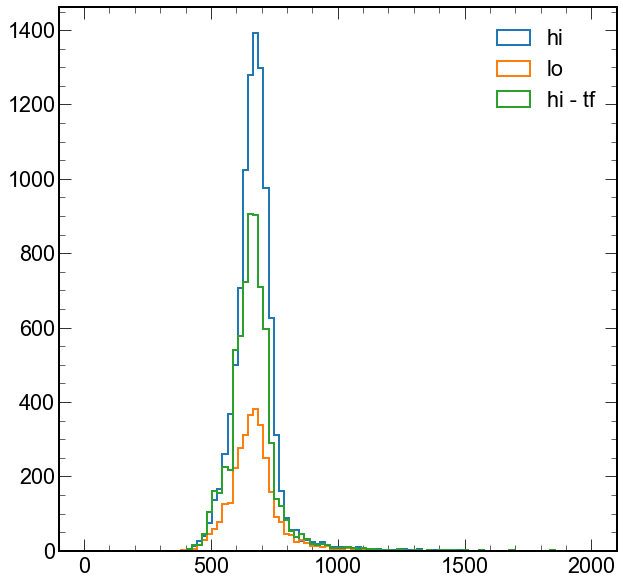

In [138]:
fig, ax = plt.subplots()

n_hi,e = Hist(sigTree.t6_X.m[sr_hi_mask], bins=np.linspace(0,2000,100), ax=ax, label='hi')
n_lo,e = Hist(sigTree.t6_X.m[sr_lo_mask], bins=np.linspace(0,2000,100), ax=ax, label='lo')
n,e = Hist(sigTree.t6_X.m[sr_lo_mask], weights=n_lo*tf, bins=np.linspace(0,2000,100), ax=ax, label='hi - tf')

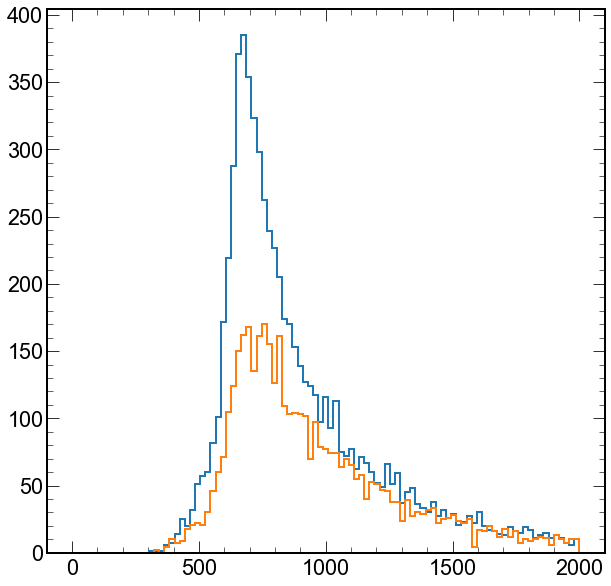

In [134]:
fig, ax = plt.subplots()

n_hi,e = Hist(sigTree.t6_X.m[cr_hi_mask], bins=np.linspace(0,2000,100), ax=ax)
n_lo,e = Hist(sigTree.t6_X.m[cr_lo_mask], bins=np.linspace(0,2000,100), ax=ax)